In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# df=pd.read_clipboard()
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day43-outlier-removal-using-iqr-method/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

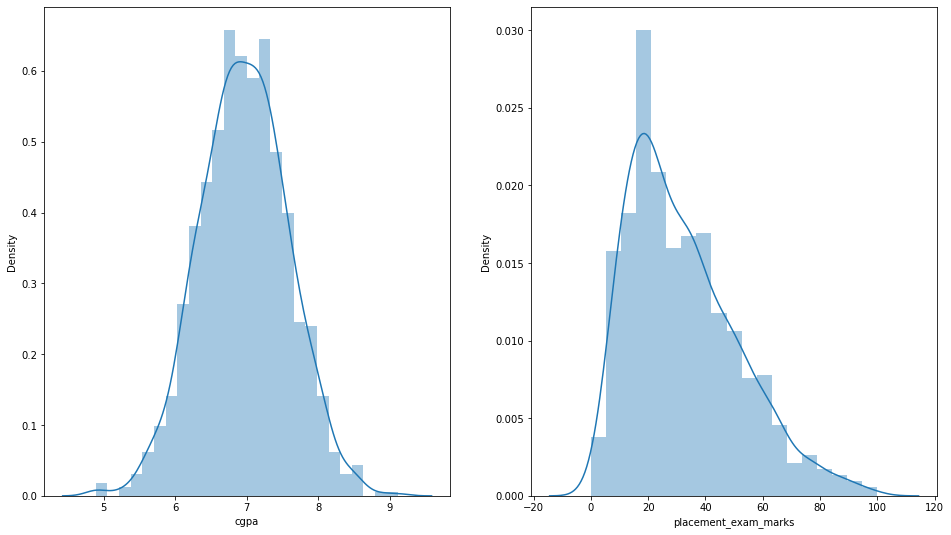

In [3]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"])
plt.subplot(1,2,2)
sns.distplot(df["placement_exam_marks"])

In [4]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [5]:
df.cgpa.skew()

-0.014529938929314918

<AxesSubplot:ylabel='Density'>

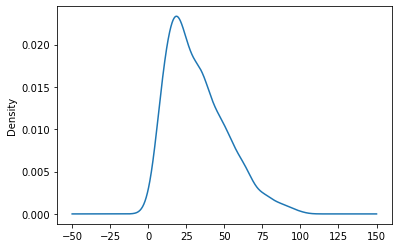

In [6]:
df["placement_exam_marks"].plot.density()

In [7]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:>

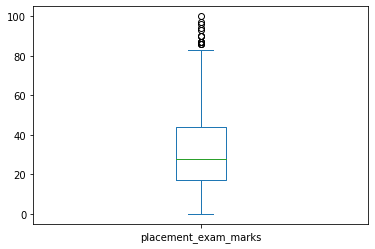

In [8]:
df["placement_exam_marks"].plot.box()

<AxesSubplot:xlabel='placement_exam_marks'>

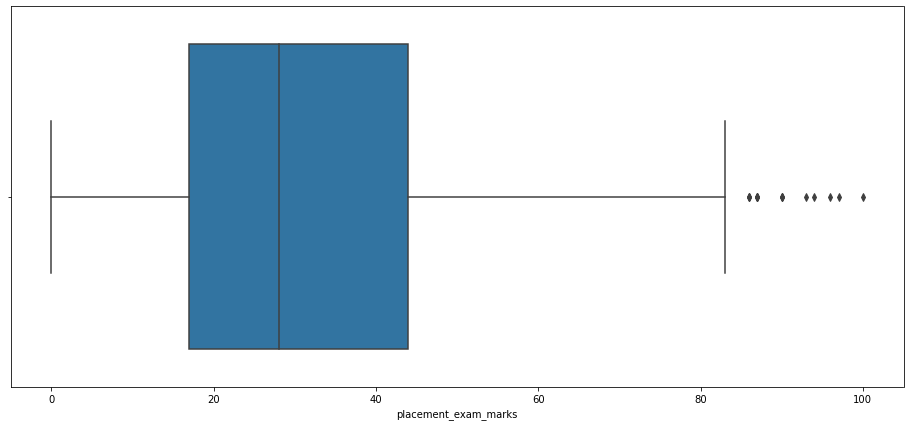

In [9]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df["placement_exam_marks"])

In [10]:
percentile25=df["placement_exam_marks"].quantile(.25)
percentile75=df["placement_exam_marks"].quantile(.75)

In [11]:
percentile25,percentile75

(17.0, 44.0)

In [12]:
IQR=percentile75-percentile25

In [13]:
IQR

27.0

In [14]:
upperlimit=percentile75+(1.5*IQR)
lowerlimit=percentile25-(1.5*IQR)

In [15]:
upperlimit,lowerlimit

(84.5, -23.5)

In [16]:
df[df["placement_exam_marks"]>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [17]:
df[df["placement_exam_marks"]<lowerlimit]

,cgpa,placement_exam_marks,placed


# Trimming 

In [18]:
new_df=df[df["placement_exam_marks"]<upperlimit]

In [19]:
new_df.shape

(985, 3)

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

<AxesSubplot:xlabel='placement_exam_marks'>

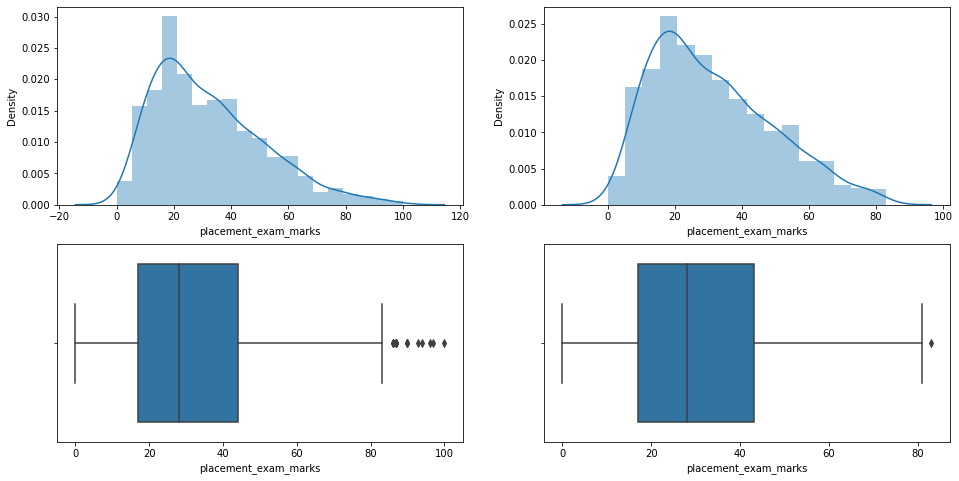

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["placement_exam_marks"])
plt.subplot(2,2,2)
sns.distplot(new_df["placement_exam_marks"])
plt.subplot(2,2,3)
sns.boxplot(df["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(new_df["placement_exam_marks"])

# Capping

In [21]:
new_df=df.copy()
new_df["placement_exam_marks"]=np.where(new_df["placement_exam_marks"]>upperlimit,
                    
                   upperlimit,np.where(new_df["placement_exam_marks"]<lowerlimit,
                                       lowerlimit,
                                       new_df["placement_exam_marks"]
                                      )
                   
                   )

In [22]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<AxesSubplot:xlabel='placement_exam_marks'>

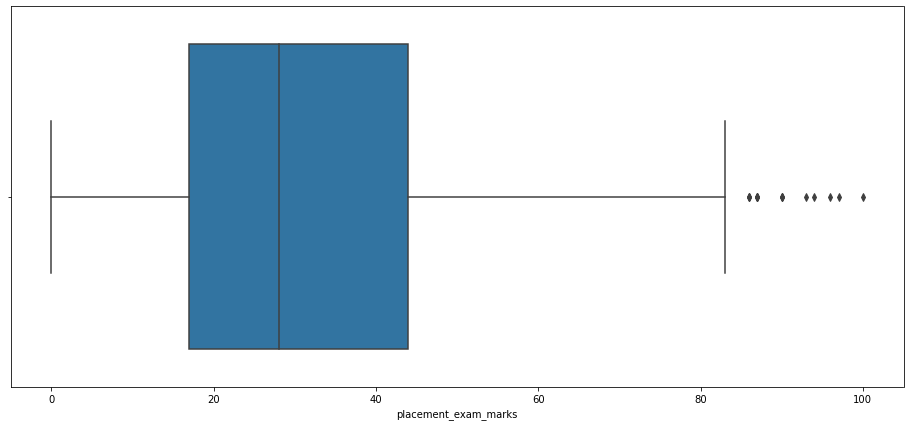

In [23]:
plt.figure(figsize=(16,7))
sns.boxplot(x=df["placement_exam_marks"])

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

<AxesSubplot:xlabel='placement_exam_marks'>

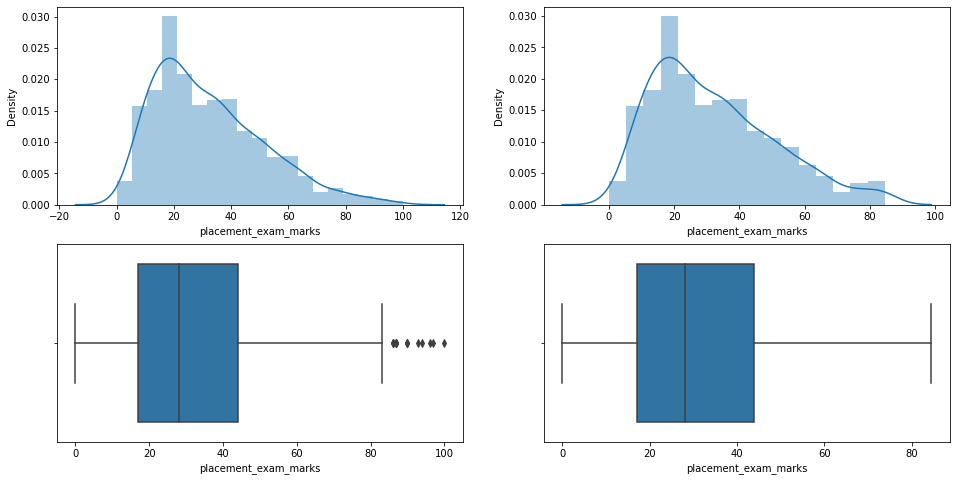

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["placement_exam_marks"])
plt.subplot(2,2,2)
sns.distplot(new_df["placement_exam_marks"])
plt.subplot(2,2,3)
sns.boxplot(df["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(new_df["placement_exam_marks"])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [28]:
x=df.iloc[:,:-1]

In [29]:
y=df.iloc[:,-1]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], d

In [34]:
lr.predict([[7.19,26.0]])

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [35]:
lr.score(x_test,y_test)

0.56

In [36]:
import pickle

In [37]:
pickle.dump(lr,open("lr.pkl","wb"))